In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report


import warnings
warnings.filterwarnings('ignore')

In [137]:
df=pd.read_csv('Absenteeism_at_work_csv.csv')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"2,39,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"2,39,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"2,39,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"2,39,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"2,39,554",...,0,1,2,1,0,1,90,172,30,2


# Key Observations

The data has 21 columns 
1. ID 
2. Reason for absence and as per the information absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

    I Certain infectious and parasitic diseases  
    II Neoplasms  
    III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism  
    IV Endocrine, nutritional and metabolic diseases  
    V Mental and behavioural disorders  
    VI Diseases of the nervous system  
    VII Diseases of the eye and adnexa  
    VIII Diseases of the ear and mastoid process  
    IX Diseases of the circulatory system  
    X Diseases of the respiratory system  
    XI Diseases of the digestive system  
    XII Diseases of the skin and subcutaneous tissue  
    XIII Diseases of the musculoskeletal system and connective tissue  
    XIV Diseases of the genitourinary system  
    XV Pregnancy, childbirth and the puerperium  
    XVI Certain conditions originating in the perinatal period  
    XVII Congenital malformations, deformations and chromosomal abnormalities  
    XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified  
    XIX Injury, poisoning and certain other consequences of external causes  
    XX External causes of morbidity and mortality  
    XXI Factors influencing health status and contact with health services.
    
    And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).

3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               740 non-null    int64 
 1   Reason for absence               740 non-null    int64 
 2   Month of absence                 740 non-null    int64 
 3   Day of the week                  740 non-null    int64 
 4   Seasons                          740 non-null    int64 
 5   Transportation expense           740 non-null    int64 
 6   Distance from Residence to Work  740 non-null    int64 
 7   Service time                     740 non-null    int64 
 8   Age                              740 non-null    int64 
 9   Work load Average/day            740 non-null    object
 10  Hit target                       740 non-null    int64 
 11  Disciplinary failure             740 non-null    int64 
 12  Education                        740

Column Work load Average/ day needs to be renamed and transformed as well as ',' needs to be replaced.


In [139]:
df.columns.str.replace(' ', '')

df.rename(columns={'Work load Average/day ':'Workload_Average'}, inplace=True)
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Workload_Average,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"2,39,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"2,39,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"2,39,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"2,39,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"2,39,554",...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,"2,64,604",...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,"2,64,604",...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,"2,71,219",...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,"2,71,219",...,0,1,2,1,0,2,100,170,35,0


In [140]:
# Encoding columns as part of transformation.
from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()

df['Workload_Average'] = le.fit_transform(df['Workload_Average'])


In [141]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Workload_Average,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,17.762162,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,11.251952,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,8.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,17.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,28.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,37.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [142]:
# Checking which all columns have null values
df.isnull().sum().sort_values(ascending=False)

Absenteeism time in hours          0
Workload_Average                   0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Hit target                         0
Body mass index                    0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
ID                                 0
dtype: int64

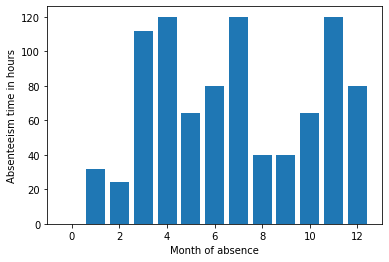

In [143]:
# Checking the Absenteeism time in hours & Month of absence

plt.bar(df['Month of absence'],df['Absenteeism time in hours'])

plt.ylabel('Absenteeism time in hours')
plt.xlabel('Month of absence')
plt.show()

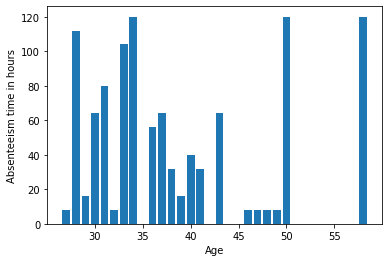

In [144]:
# Checking the Absenteeism time in hours & Age
#df['Absenteeism time in hours'].unique()

#plt.figure(figsize=(12,10))
plt.bar(df['Age'],df['Absenteeism time in hours'])
plt.ylabel('Absenteeism time in hours')
plt.xlabel('Age')
plt.show()

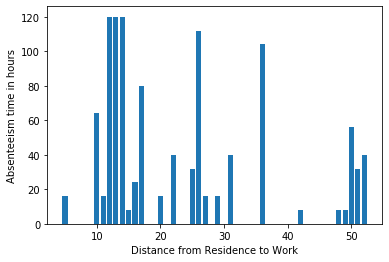

In [145]:
# Checking the Absenteeism time in hours & Distance from Residence to Work

#plt.figure(figsize=(12,10))
plt.bar(df['Distance from Residence to Work'],df['Absenteeism time in hours'])
plt.ylabel('Absenteeism time in hours')
plt.xlabel('Distance from Residence to Work')
plt.show()

In [146]:
# Checking the zscore in order to normalize the data.
from scipy.stats import zscore
z= np.abs(zscore(df))
z

array([[0.63716146, 0.80493838, 0.19676258, ..., 0.01904601, 0.77593223,
        0.21951111],
       [1.63271857, 2.28012426, 0.19676258, ..., 0.97582783, 1.00943766,
        0.51976661],
       [1.36352307, 0.44896961, 0.19676258, ..., 0.35067062, 1.00943766,
        0.36963886],
       ...,
       [1.27272787, 2.28012426, 1.84169773, ..., 0.35067062, 1.70995395,
        0.51976661],
       [0.90954706, 2.28012426, 1.84169773, ..., 0.35067062, 1.94345938,
        0.51976661],
       [1.54192337, 2.28012426, 1.84169773, ..., 0.47839091, 0.39159492,
        0.51976661]])

In [147]:
# Verifying for the presence of zscore value of data with threshold of more than 3 std score.

threshold=3
print(np.where(z>3))

(array([  1,   3,   8,  27,  31,  31,  33,  33,  38,  38,  44,  50,  51,
        54,  55,  58,  64,  83,  85,  89,  91,  99, 104, 116, 140, 157,
       158, 164, 165, 167, 169, 172, 180, 186, 188, 197, 199, 200, 203,
       203, 203, 205, 206, 210, 213, 213, 214, 215, 215, 216, 226, 231,
       232, 234, 236, 242, 245, 251, 253, 255, 256, 257, 270, 271, 272,
       273, 273, 274, 275, 276, 276, 277, 277, 278, 279, 280, 281, 282,
       283, 284, 285, 285, 286, 287, 288, 293, 294, 299, 300, 303, 311,
       312, 313, 313, 322, 323, 323, 325, 336, 336, 337, 337, 355, 360,
       362, 384, 396, 397, 400, 405, 406, 407, 420, 421, 432, 433, 434,
       446, 468, 469, 469, 471, 479, 481, 488, 498, 507, 510, 513, 521,
       530, 548, 549, 551, 562, 564, 569, 569, 572, 573, 575, 576, 577,
       579, 592, 594, 601, 603, 608, 620, 622, 622, 640, 647, 648, 652,
       661, 670, 675, 681, 682, 682, 683, 688, 690, 690, 691, 692, 692,
       695, 702, 703, 704, 706, 710, 712, 714, 714, 714, 715, 7

In [148]:
# Removing the outliers having zscore value of more than 3.
absentism_data=df[(z<3).all(axis=1)]
absentism_data.shape

(576, 21)

In [149]:
absentism_data.skew()

ID                                -0.058065
Reason for absence                -1.027334
Month of absence                   0.109690
Day of the week                    0.082048
Seasons                           -0.019301
Transportation expense             0.327717
Distance from Residence to Work    0.199294
Service time                      -0.153111
Age                                0.517042
Workload_Average                   0.133439
Hit target                        -0.461369
Disciplinary failure               0.000000
Education                          1.990046
Son                                1.447470
Social drinker                    -0.188822
Social smoker                      0.000000
Pet                                1.721238
Weight                            -0.128296
Height                             1.449688
Body mass index                    0.037118
Absenteeism time in hours          3.171312
dtype: float64

Columns Reason for absence,Education, Son, Pet, Height &  Absenteeism time in hours have highly skewed data.

In [150]:
col = ['Reason for absence','Education','Son','Pet','Height','Absenteeism time in hours']
#col = ['Reason for absence','Education','Son','Pet','Height']
col

['Reason for absence',
 'Education',
 'Son',
 'Pet',
 'Height',
 'Absenteeism time in hours']

In [151]:
# Reducing the skewness with boxcox1p in order to avoid 0 encountered as negative while transformation.

from scipy.special import boxcox1p
# 0 -> log transform
# .5 -> square root transform

for i in col:
    absentism_data[i]=boxcox1p(absentism_data[i],0.5)

absentism_data.skew()

ID                                -0.058065
Reason for absence                -1.577800
Month of absence                   0.109690
Day of the week                    0.082048
Seasons                           -0.019301
Transportation expense             0.327717
Distance from Residence to Work    0.199294
Service time                      -0.153111
Age                                0.517042
Workload_Average                   0.133439
Hit target                        -0.461369
Disciplinary failure               0.000000
Education                          1.969805
Son                                0.974288
Social drinker                    -0.188822
Social smoker                      0.000000
Pet                                1.276333
Weight                            -0.128296
Height                             1.408450
Body mass index                    0.037118
Absenteeism time in hours          1.686030
dtype: float64

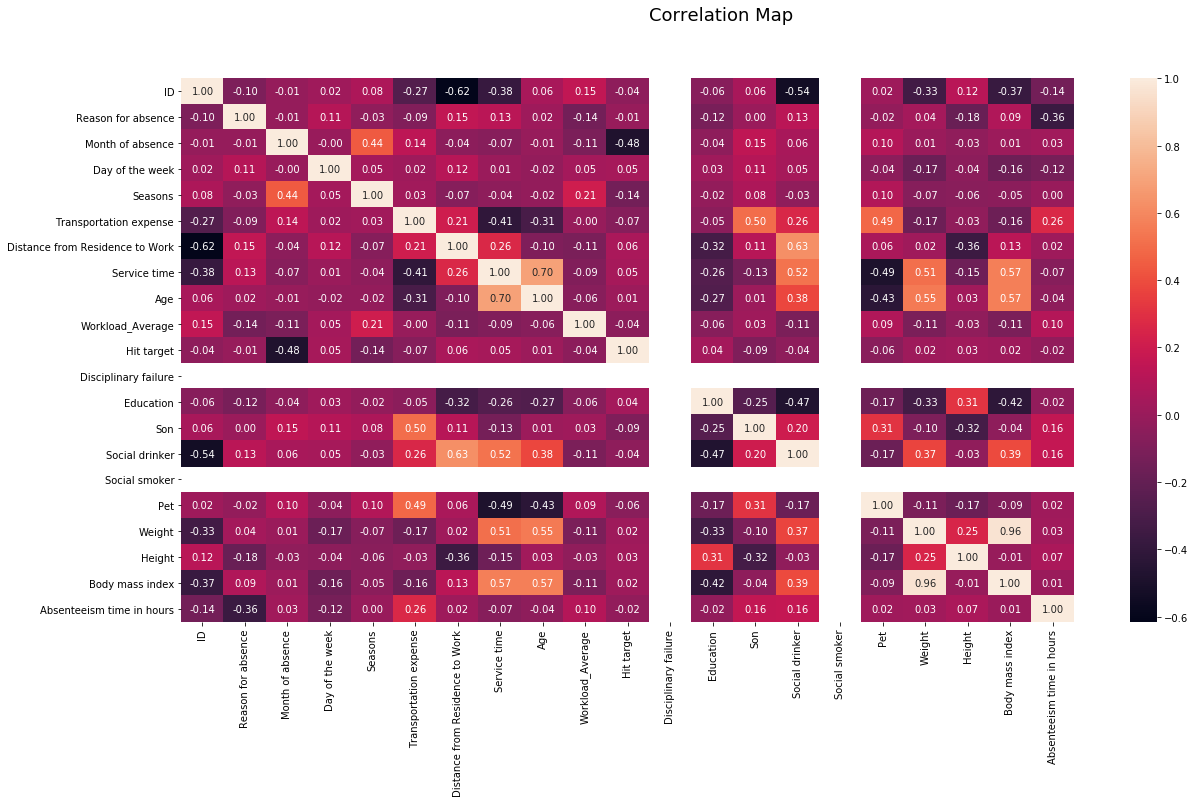

In [152]:
plt.figure(figsize=(20,10)) 
sns.heatmap(absentism_data.corr(), annot=True, fmt=".2f") 
plt.suptitle("Correlation Map", fontsize=18)
plt.show()  

In [153]:
# Dropping Disciplinary failure,Social smoker from the dataset.
absentism_data.drop(['Disciplinary failure','Social smoker'],axis=1, inplace=True)

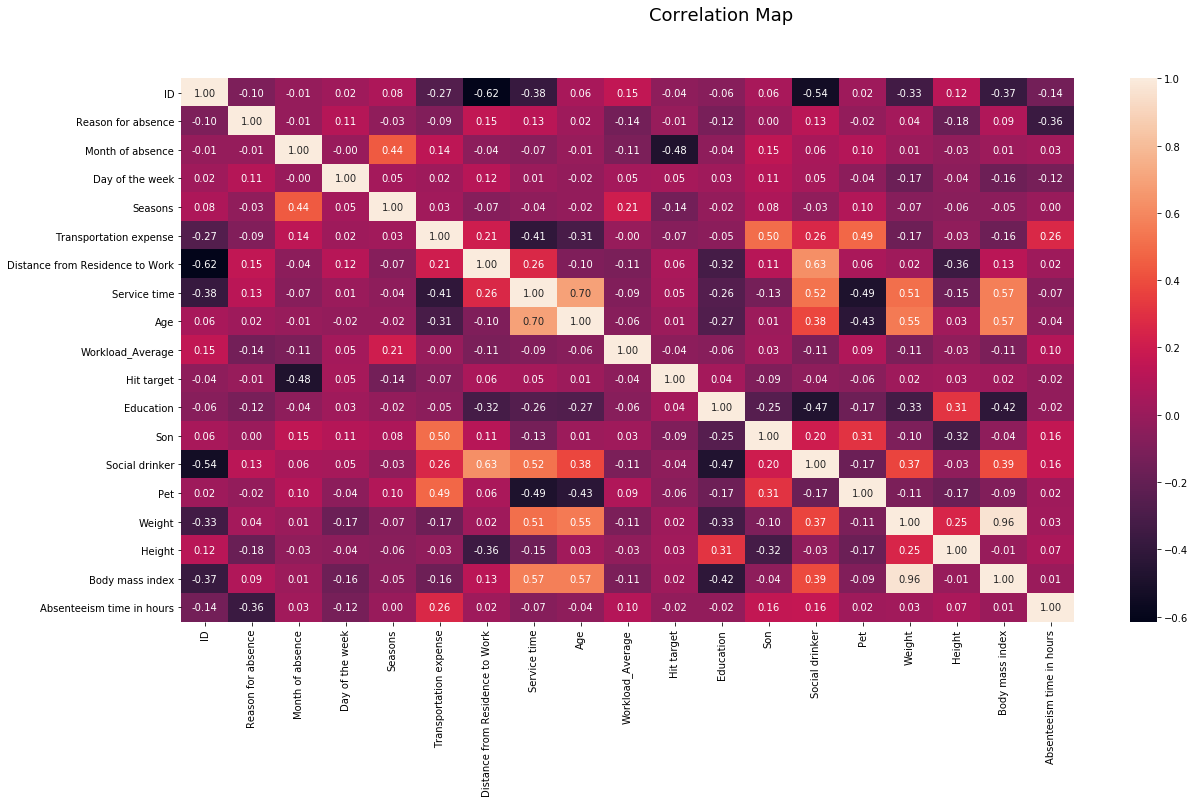

In [154]:
plt.figure(figsize=(20,10)) 
sns.heatmap(absentism_data.corr(), annot=True, fmt=".2f") 
plt.suptitle("Correlation Map", fontsize=18)
plt.show()  

Transportation expenses, Social drinking and having a son seems to have high correlation with being Absentism at work from the above Correlation Map.

In [155]:
# Setting x  by excluding 'Absenteeism time in hours' column which is y here for prediction.
x=absentism_data.drop(['Absenteeism time in hours'],axis=1)
x

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Workload_Average,Hit target,Education,Son,Social drinker,Pet,Weight,Height,Body mass index
0,11,8.392305,7,3,1,289,36,13,33,6,97,0.828427,1.464102,1,0.828427,90,24.305893,30
2,3,7.797959,7,4,1,179,51,18,38,6,97,0.828427,0.000000,1,0.000000,89,24.153394,31
4,11,7.797959,7,5,1,289,36,13,33,6,97,0.828427,1.464102,1,0.828427,90,24.305893,30
5,3,7.797959,7,6,1,179,51,18,38,6,97,0.828427,0.000000,1,0.000000,89,24.153394,31
6,10,7.591663,7,6,1,361,52,3,28,6,97,0.828427,0.828427,1,2.472136,80,24.305893,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,28,7.591663,7,4,1,225,26,9,28,18,93,0.828427,0.828427,0,1.464102,69,24.076810,24
735,11,5.745967,7,3,1,289,36,13,33,18,93,0.828427,1.464102,1,0.828427,90,24.305893,30
736,1,4.928203,7,3,1,235,11,14,37,18,93,2.000000,0.828427,0,0.828427,88,24.305893,29
738,8,0.000000,0,4,2,231,35,14,39,22,95,0.828427,1.464102,1,1.464102,100,24.153394,35


In [156]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x=scale.fit_transform(x)

In [157]:
# Setting Y column.

y=absentism_data['Absenteeism time in hours']
y

0      2.472136
2      1.464102
4      1.464102
5      1.464102
6      4.000000
         ...   
733    4.000000
735    4.000000
736    2.472136
738    0.000000
739    0.000000
Name: Absenteeism time in hours, Length: 576, dtype: float64

In [158]:

max_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lm=LinearRegression()
    lm.fit(train_x,train_y)
    pred=lm.predict(test_x)
    score=lm.score(x,y)
    #print("Score corresponding to r_state: ",r_state," is ",score)
    if(score>max_score):
        max_score=score
        final_rstate=r_state
        
print("\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_score)



Max_accuracy_Score corresponding to final_r_state:  89  is  0.2630929854093459


In [159]:
# Setting the test x & y values and using the random state from above step which is 51.

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=89)

In [160]:
train_x.shape

(432, 18)

In [161]:
train_y.shape

(432,)

In [162]:
test_x.shape

(144, 18)

In [163]:
test_y.shape

(144,)

In [164]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [165]:
KNN=KNeighborsRegressor(n_neighbors=10)
SV=SVR()
LR=LinearRegression()
DT=DecisionTreeRegressor(random_state=10)
LS = Lasso(alpha=0.01)
RD = Ridge(alpha=0.01)
EL = ElasticNet(alpha=0.01)
RF = RandomForestRegressor(n_estimators=100,random_state=10)
AD = AdaBoostRegressor()
GB = GradientBoostingRegressor()

In [166]:
models=[]
models.append(('KNeighborsRegressor',KNN))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DT))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EL))
models.append(('RandomForestRegressor',RF))
models.append(('AdaBoostRegressor',AD))
models.append(('GradientBoostingRegressor',GB))

In [167]:
Model=[]
score=[]
cvs=[]
mae=[]
mse=[]
rmae=[]

for name,model in models:
    print("--------------",name,"--------------")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    # Metrics
    m1=mean_absolute_error(test_y,pred)
    print("Mean absolute error",m1)
    mae.append(m1)
           
    m2=mean_squared_error(test_y,pred)
    print("Mean squared error",m2)
    mse.append(m2)
    
    
    m3=np.sqrt(mean_squared_error(test_y,pred))
    print("Root Mean absolute error",m3)
    rmae.append(m3)
    
    #Model performance
    modelscore=model.score(test_x,test_y)
    print("Score: ",modelscore )
    score.append(modelscore*100)
    print("\n")

-------------- KNeighborsRegressor --------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
Mean absolute error 1.5644538535684378
Mean squared error 4.127405842674433
Root Mean absolute error 2.0316017923486958
Score:  0.181790961822479


-------------- SVR --------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Mean absolute error 1.5644538535684378
Mean squared error 4.127405842674433
Root Mean absolute error 2.0316017923486958
Score:  0.22255372217847513


-------------- LinearRegression --------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean absolute error 1.5644538535684378
Mean squared error 4.127405842674433
Root Mean absolute error 2.0316017923486958
Score:  0.24301281849201628


-------

In [168]:
result=pd.DataFrame({"Model": Model, "Score": score})
result

,Model,Score
0,KNeighborsRegressor,18.179096
1,SVR,22.255372
2,LinearRegression,24.301282
3,DecisionTreeRegressor,16.800645
4,Lasso,24.901209
5,Ridge,24.304563
6,ElasticNet,24.728035
7,RandomForestRegressor,40.299631
8,AdaBoostRegressor,40.416277
9,GradientBoostingRegressor,34.496788


# AdaBoostRegressor is the better model with over 40% accuracy.

In [169]:
# Saving the prediction data in a file.

predictData=pd.DataFrame(pre)
absentism_data.to_csv('absentism_Predict.csv')
predictData

,0
0,3.065266
1,4.012250
2,2.072220
3,1.627043
4,1.219017
...,...
139,4.815453
140,1.611697
141,3.026545
142,2.799925


In [170]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(AD,"AD_AbsentsimAtWork.pkl")

['AD_AbsentsimAtWork.pkl']